#### Imports of packages and data

The first steps include the import of the packages and example data, creation of dataframes from the sdf files, including the smiles string as well as the morganfp in them and then the creation of varible arrays for the modelling step.

In [2]:
import pkasolver as ps
from pkasolver import util
from pkasolver import analysis
import pandas as pd

In [3]:
data_folder_Bal = "../data/Baltruschat/"


SDFfile1 = data_folder_Bal + "combined_training_datasets_unique.sdf"
SDFfile2 = data_folder_Bal + "novartis_cleaned_mono_unique_notraindata.sdf"
SDFfile3 = data_folder_Bal + "AvLiLuMoVe_cleaned_mono_unique_notraindata.sdf"

In [4]:
df1 = ps.util.import_sdf(SDFfile1)
df2 = ps.util.import_sdf(SDFfile2)
df3 = ps.util.import_sdf(SDFfile3)

df1 = ps.util.morgan_fp(df1,2,4096)
df2 = ps.util.morgan_fp(df2,2,4096)
df3 = ps.util.morgan_fp(df3,2,4096)

In [5]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(5994, 9)
(280, 9)
(123, 9)


In [6]:
X_feat1,y1 = ps.util.make_stat_variables(df1, [],["pKa"] )
X_fp1=ps.util.make_fp_array(df1)
X1=ps.util.cat_variables(X_feat1,X_fp1)

X_feat2,y2 = ps.util.make_stat_variables(df2, [],["pKa"] )
X_fp2=ps.util.make_fp_array(df2)
X2=ps.util.cat_variables(X_feat2,X_fp2)

X_feat3,y3 = ps.util.make_stat_variables(df3, [],["pKa"] )
X_fp3=ps.util.make_fp_array(df3)
X3=ps.util.cat_variables(X_feat3,X_fp3)

#### Modelling and testing

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [8]:
rfr=RandomForestRegressor(n_estimators=50, random_state=0)

In [29]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state = 0)
cvs=cross_val_score(rfr, X1, y1, cv=kf)


In [36]:
str(cvs.mean()) +" + "+ str(cvs.std())

'0.7880165419362273 + 0.02270841669580356'

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [17]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [22]:
pred1 = rfr.predict(X_test)
rfr.fit(X1,y1)
pred2 = rfr.predict(X2)
pred3 = rfr.predict(X3)

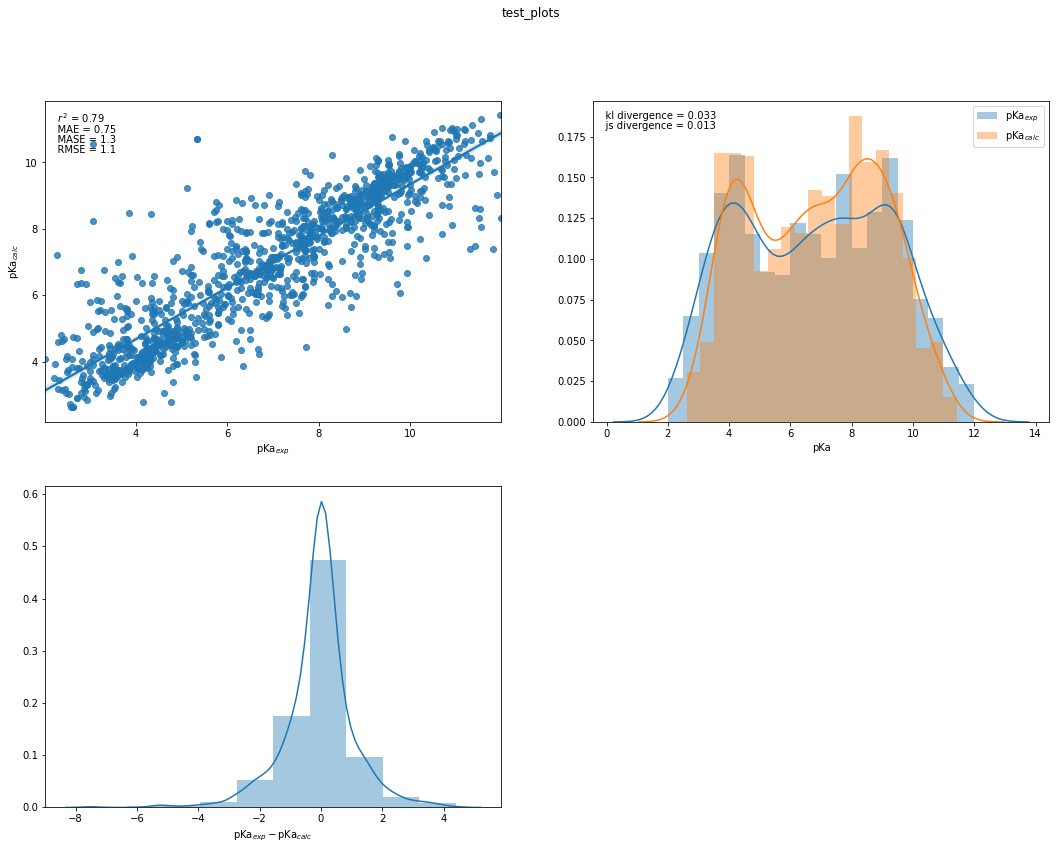

In [23]:
ps.util.plot_results(pred1,y_test,'test_plots')

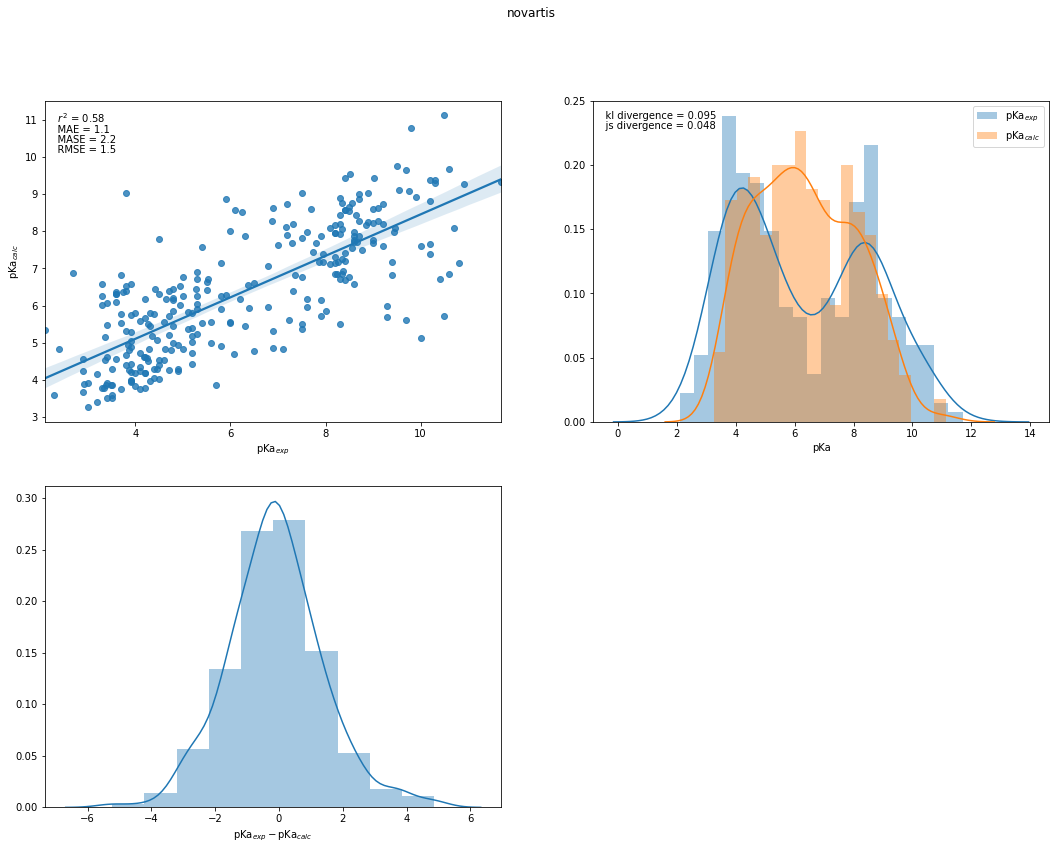

In [24]:
ps.util.plot_results(pred2,y2,'novartis') 

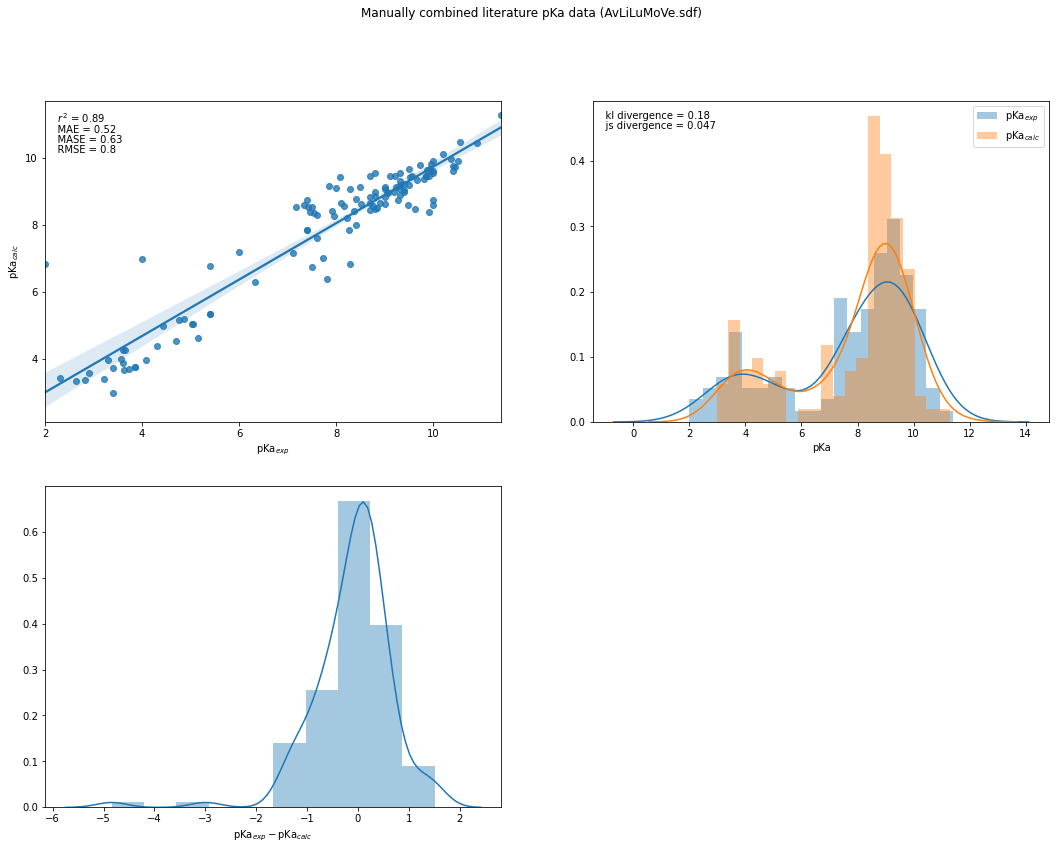

In [25]:
ps.util.plot_results(pred3,y3,'Manually combined literature pKa data (AvLiLuMoVe.sdf)') 

#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
parameters = {"n_estimators":[*range(50,501,50)]}

In [ ]:
#GSCV = ps.analysis.hyperparameter_tuning(X,y,parameters,df1)

Mesomeres and Tautomeres

In [48]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

In [52]:
def mesfuction(smi,nB=4096, neigh=2):
    mol = Chem.MolFromSmiles(smi)
    bstring = AllChem.GetMorganFingerprintAsBitVect(mol,neigh,nBits=nB)
    X = np.zeros((1,nB))
    X[0,:] = AllChem.GetMorganFingerprintAsBitVect(mol,neigh,nBits=nB)
    #X[1,:] = AllChem.GetMorganFingerprintAsBitVect(mol,neigh,nBits=nB)
    return X

In [140]:
Acetessigester_keton='CC(CC(OCC)=O)=O'
Acetessigester_enol ='C=C(CC(OCC)=O)-O'
Acetessigester_enol2 ='CC(=CC(OCC)=O)-O'
Acetessigester_enol3 ='CC(C=C(OCC)-O)=O'

Arginin1 = 'C(CC(C(=O)O)N)CN=C(N)N'
Arginin2 = 'C(CC(C(=O)O)N)CNC(N)=N'

CList = [Acetessigester_enol,Acetessigester_enol2,Acetessigester_enol3,Acetessigester_keton,Arginin1,Arginin2]

In [141]:
for i in CList:
    print(rfr.predict(mesfuction(i)))



[5.66652333]
[5.74052333]
[5.74052333]
[5.72772333]
[5.99772333]
[5.99772333]


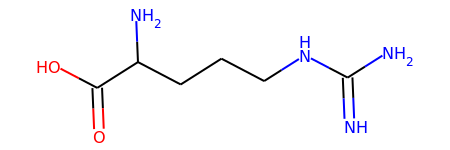

In [139]:
m = Chem.MolFromSmiles(CList[-1])
m

In [54]:
mesfuction('Brc1ccccc1c2nn[nH]n2')

array([[0., 0., 0., ..., 0., 0., 0.]])

In [23]:
rfr.predict(mesfuction('Brc1ccccc1c2nn[nH]n2'))

array([7.0747, 7.0747])

In [24]:
rfr.predict(mesfuction('Brc1ccccc1c2nn[n-]n2'))

array([3.84966666, 3.84966666])

In [26]:
prot = 'Brc1ccccc1c2nn[nH]n2'
deprot = 'Brc1ccccc1c2nn[n-]n2'

'C=CC(=O)O'
'[CH2+]/C=C(O)/[O-]'

'[CH2+]/C=C(O)/[O-]'

In [27]:
rfr.predict(mesfuction('C=CC(=O)O'))

array([8.7316, 8.7316])

In [28]:
rfr.predict(mesfuction('[CH2+]/C=C(O)/[O-]'))

array([3.89825667, 3.89825667])

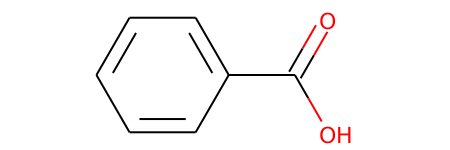

In [29]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
m

Difference function:

In [3]:
def diffcheck(smi1,smi2,radius=3,nBits=4096):
    m1= Chem.MolFromSmiles(smi1)
    m2= Chem.MolFromSmiles(smi2)
    fp1 = AllChem.GetMorganFingerprintAsBitVect(m1,radius,nBits, useFeatures=True)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(m2,radius,nBits, useFeatures=True)
    return fp1 != fp2

In [32]:
diffcheck('c1ccccc1','c1ccccccc1')

True

In [33]:
diffcheck(Acetessigester_keton,Acetessigester_enol)

True

In [34]:
diffcheck(Arginin1,Arginin2)

True

In [59]:
taut = molvs.enumerate_tautomers_smiles('CC(CC(OCC)=O)=O')
Chem.ResonanceMolSupplier()